## Becoming a DataVizard exercise 

This is an exercise about data visualization, welcome! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with two datasets: a dataset containing information about the top ten grossing movies in each year, and a dataset with information about the population in Swiss communes. 

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations, and match your desired style.

Beyond Matplotlib and Searbon, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [4]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

In [5]:
# This is a helper bootstrapping function you can use in this exercise to obtain 95% confidence
# intervals around the estimated average. The underlying concept will be explained in the next week's lecture.

# Input: your array and the number of random samples (e.g., 1000 is a good number)
# Output: [lower error, upper error]

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

# 1. Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram

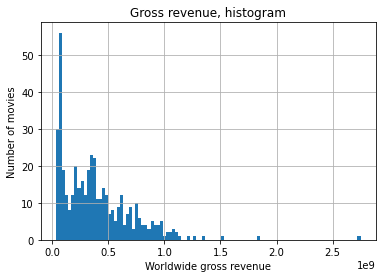

In [6]:
#we use pandas wrapper
movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');

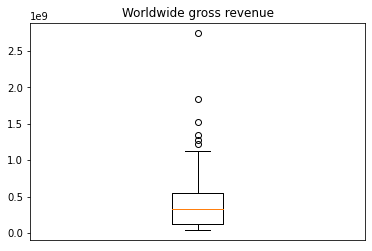

In [7]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([])
plt.title('Worldwide gross revenue');

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot()

Text(0, 0.5, 'IMDB rating')

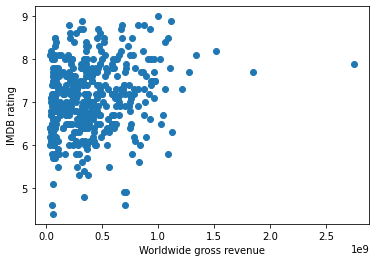

In [8]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
--> The higher the revenue, does not necessarily mean the highest imdb rating, some with the highest imbd rating did not have an impressive gross revenue.
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter

Text(0, 0.5, 'IMDB rating')

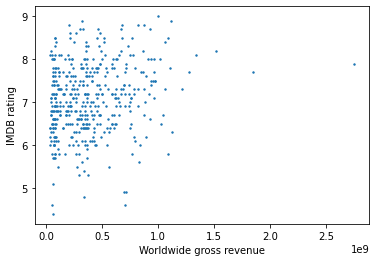

In [9]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')

- Do you notice anything strange? What could be the reason?
--> Some dots are so near to each other that they agglomerate

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions. 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


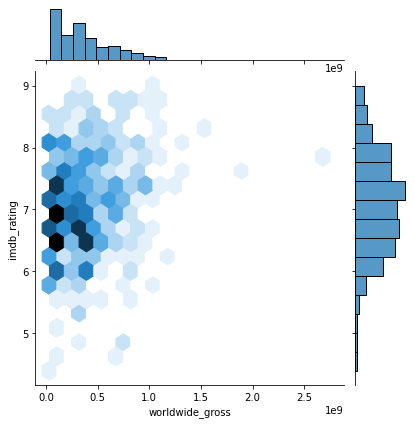

In [10]:
sns.jointplot(movies['worldwide_gross'], movies['imdb_rating'], kind="hex")

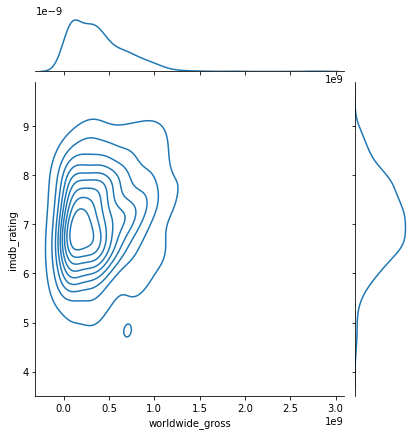

In [11]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde")


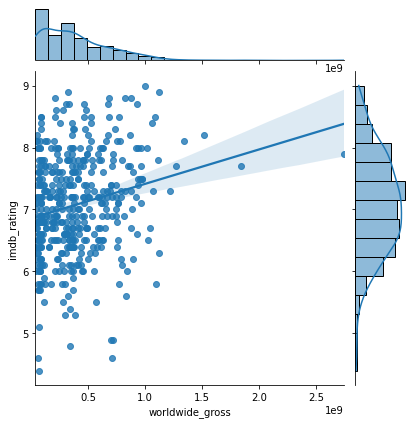

In [12]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html)

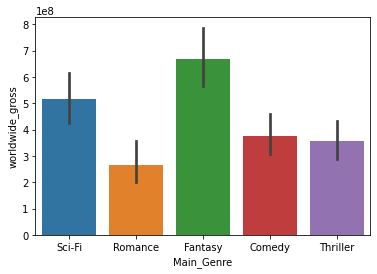

In [13]:
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

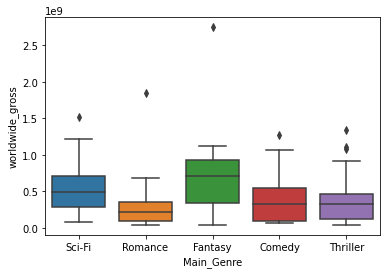

In [14]:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

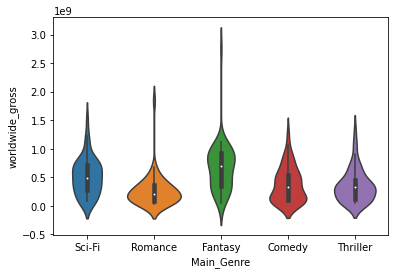

In [15]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])

# 2. Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


## 2.1 Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the upper and lower bound. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions. You can use the provided "bootstrap_CI" function to create confidence intervals.

- Did the average revenue increase/decrease over time? What do you observe?


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>


<br>


In [16]:
movies.head(50)

Main_Genre    Genre_2    Genre_3  imdb_rating  length  rank_in_year rating  \
0      Action  Adventure      Drama          7.4     135             1  PG-13   
1      Action  Adventure     Sci-Fi          8.5     156             2  PG-13   
2   Animation     Action  Adventure          7.8     118             3     PG   
3      Action  Adventure      Drama          6.2     129             4  PG-13   
4      Action     Comedy        NaN          7.8     119             5      R   
5      Action  Adventure      Drama          7.9     147             6  PG-13   
6      Action     Comedy        NaN          7.2     118             7  PG-13   
7      Action  Adventure      Drama          7.0     135             8  PG-13   
8      Action  Adventure      Drama          6.9     112             9  PG-13   
9       Music      Drama        NaN          8.1     135            10      R   
10     Action  Adventure      Drama          7.2     152             1  PG-13   
11      Music      Drama        NaN          7.2     129             2     PG   
12     Action  Adventure      Drama          7.5     141             3  PG-13   
13     Action  Adventure     Comedy          7.0     112             4  PG-13   
14     Action  Adventure     Comedy          7.7     137             5  PG-13   
15     Action  Adventure      Drama          7.5     133             6  PG-13   
16     Horror      Drama    Mystery          7.4     135             7      R   
17     Action  Adventure      Drama          7.9     130             8  PG-13   
18  Animation     Comedy        NaN          6.3      90             9     PG   
19     Action  Adventure      Drama          6.5     110            10  PG-13   
20     Action  Adventure      Drama          7.8     133             1  PG-13   
21  Animation     Family        NaN          7.3     100             2     PG   
22     Action  Adventure     Sci-Fi          7.8     146             3  PG-13   
23  Animation     Comedy        NaN          6.5      90             4     PG   
24     Action  Adventure     Family          7.4     111             5     PG   
25     Action     Comedy  Adventure          8.0     103             6      R   
26  Animation     Action  Adventure          8.0     108             7     PG   
27     Action  Adventure     Sci-Fi          6.5     151             8  PG-13   
28     Action  Adventure        NaN          6.1     123             9  PG-13   
29  Animation      Music     Comedy          7.1     108            10     PG   
30     Action  Adventure    Fantasy          8.0     136             1  PG-13   
31     Action  Adventure    Mystery          7.0     123             2  PG-13   
32     Action  Adventure     Sci-Fi          7.4     141             3  PG-13   
33  Animation     Family        NaN          8.2      94             4     PG   
34     Action  Adventure    Mystery          7.2     140             5  PG-13   
35  Animation     Comedy     Family          6.4      91             6     PG   
36     Action  Adventure    Fantasy          6.6     137             7  PG-13   
37     Sci-Fi    Fantasy        NaN          8.0     164             8  PG-13   
38    Romance    Fantasy        NaN          6.9     105             9     PG   
39     Action  Adventure        NaN          6.8     150            10  PG-13   
40     Sci-Fi  Adventure     Action          5.8     165             1  PG-13   
41    Fantasy  Adventure        NaN          7.5     144             2  PG-13   
42     Sci-Fi  Adventure     Action          8.1     121             3  PG-13   
43    Fantasy  Adventure     Action          7.1      97             4     PG   
44     Sci-Fi  Adventure        NaN          6.8     123             5  PG-13   
45     Sci-Fi  Adventure     Action          8.1     131             6  PG-13   
46     Sci-Fi  Adventure     Action          7.8     136             7  PG-13   
47    Fantasy  Adventure     Action          6.9     142             8  PG-13   
48     Sci-Fi      Drama     Actio

### Calculate yearly stats across movies here

In [17]:
movies_by_year = movies.groupby("year")
movies_by_year["worldwide_gross"].agg('mean')

year
1975    4.096674e+07
1976    6.642076e+07
1977    9.808576e+07
1978    8.944416e+07
1979    8.086015e+07
1980    8.873752e+07
1981    8.992104e+07
1982    1.256980e+08
1983    9.525617e+07
1984    1.291739e+08
1985    1.021618e+08
1986    1.128336e+08
1987    1.020567e+08
1988    1.107339e+08
1989    2.761461e+08
1990    3.241124e+08
1991    2.775128e+08
1992    3.089338e+08
1993    3.467768e+08
1994    3.801087e+08
1995    3.258590e+08
1996    3.849961e+08
1997    5.137346e+08
1998    3.670852e+08
1999    4.800680e+08
2000    3.749659e+08
2001    5.270907e+08
2002    5.668450e+08
2003    5.867333e+08
2004    6.030925e+08
2005    5.858617e+08
2006    5.753496e+08
2007    6.952406e+08
2008    6.365738e+08
2009    9.094390e+08
2010    7.579267e+08
2011    7.920100e+08
2012    9.255655e+08
2013    8.847162e+08
2014    7.885730e+08
2015    4.004837e+08
2016    3.789137e+08
2017    3.801477e+08
2018    3.786045e+08
Name: worldwide_gross, dtype: float64

In [18]:
bound_error = []
year_list = []
upper_bound = []
lower_bound = []

for year, group in movies_by_year:
    year_list.append(year)
    bounds = bootstrap_CI(group["worldwide_gross"], 1000)
    upper_bound.append(bounds[1])
    lower_bound.append(bounds[0])
    error = bounds[1] - bounds[0]
    bound_error.append(error)
    
len(bound_error)

44

### Write your code to make plot with errorbars here

Text(0, 0.5, 'Worldwide Gross Income')

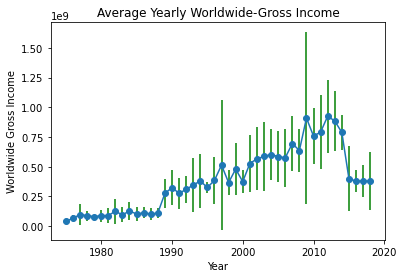

In [19]:
plt.errorbar(year_list,movies_by_year["worldwide_gross"].agg('mean'),bound_error,fmt='-o', ecolor='g', capthick=2)
plt.title("Average Yearly Worldwide-Gross Income")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross Income")

### Write your code to make filled plot here

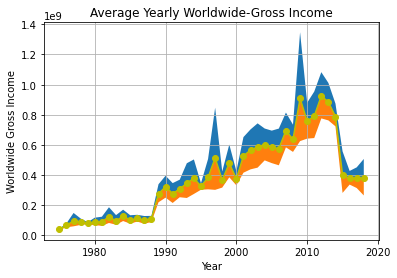

In [20]:
plt.figure()
plt.plot(year_list,movies_by_year["worldwide_gross"].agg('mean'),'-o',color='y')
plt.fill_between(year_list,movies_by_year["worldwide_gross"].agg('mean'),upper_bound)
plt.fill_between(year_list,movies_by_year["worldwide_gross"].agg('mean'),lower_bound)
plt.title("Average Yearly Worldwide-Gross Income")
plt.xlabel("Year")
plt.ylabel("Worldwide Gross Income")
plt.grid(True)

### Write your interpretation here:
The uncertainty greatly increases around the 2000s compared to previously before...

## 2.2 Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a skets of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes

- What genres do the longest movies belong too? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.

<img src="figure3.jpg" style="width: 500px;" align="left">

### Calculate stats by genre

In [21]:
movies_by_genre = movies.groupby("Main_Genre")

genres = []
genre_lengths = []

for genre, group in movies_by_genre:
    genres.append(genre)
    genre_lengths.append(group['length'].values)

### Write your code to make 4x4 panel here

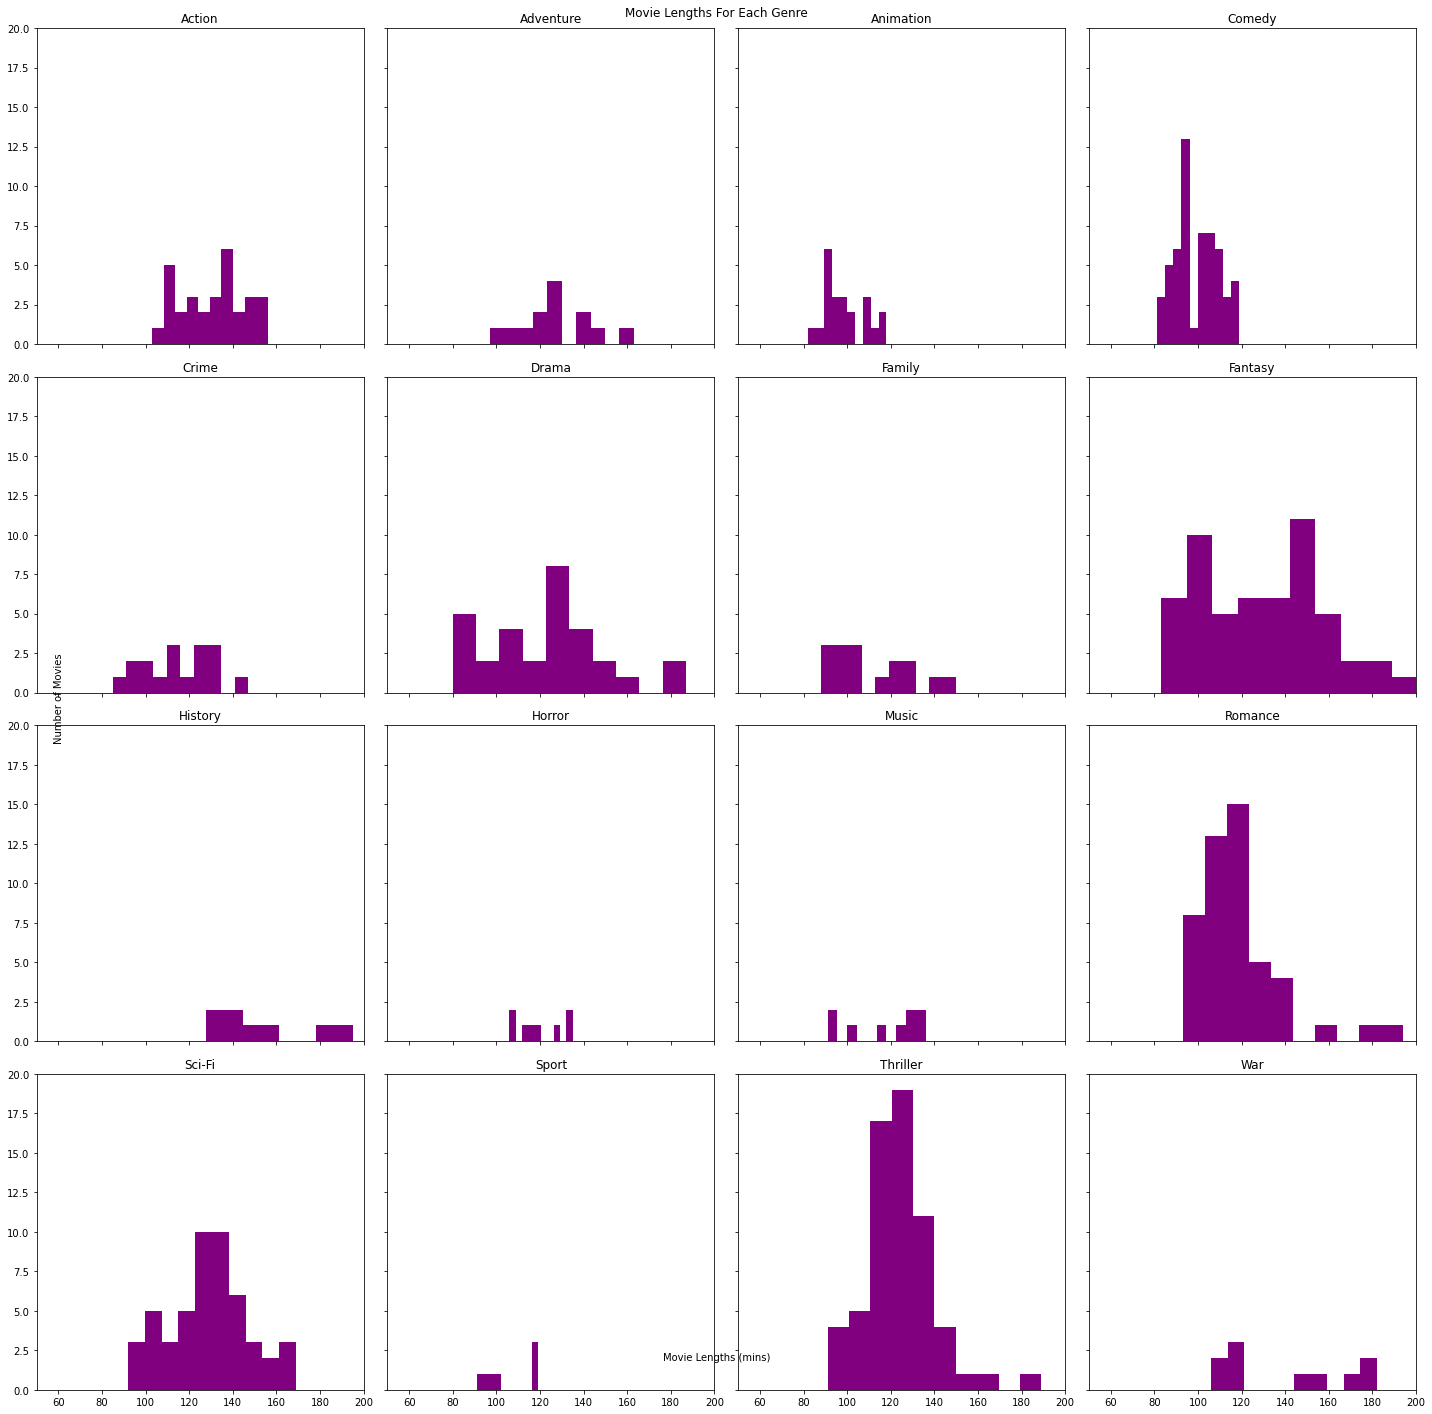

In [22]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey = True, figsize=(20,20))
count = 0
for i in range(4):
    for j in range(4):
        axs[i][j].hist(genre_lengths[count], facecolor='purple')
        axs[i][j].set_title(genres[count])
        axs[i][j].set_xlim([50, 200])
        axs[i][j].set_ylim([0,20])
        count += 1

        
fig.suptitle('Movie Lengths For Each Genre')
fig.text(0.5, 0.04, 'Movie Lengths (mins)', ha='center')
fig.text(0.04, 0.5, 'Number of Movies', va='center', rotation='vertical')
fig.tight_layout()

### Write your interpretation here

The longest movies belong to fantasy and horror.

## 2.3 Heatmaps

- What studios make blockbusters in which genre? 

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function. 

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?



<img src="figure4.jpg" style="width: 500px;" align="left">

### Write your code to make the first heatmap here

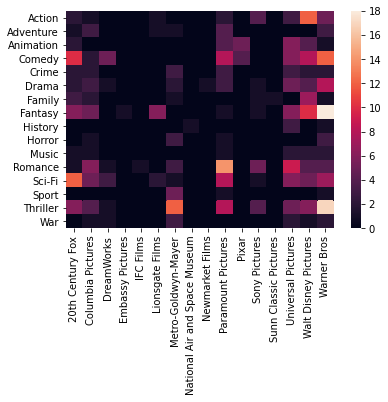

In [23]:
movies_by_studios = movies.groupby("studio")
studio_list = []
heatmap_matrix = np.zeros((16,len(movies_by_studios)))

#Move along matrix for heatmap
studio_num = 0
genre_num = 0

for studio, group in movies_by_studios:
    studio_list.append(studio)
    #print(studio)
    genre_num = 0
    for genre in genres:
        #print(genre)
        #print(group["Main_Genre"].loc[group["Main_Genre"] == genre].agg('count'))
        heatmap_matrix[genre_num][studio_num] = group["Main_Genre"].loc[group["Main_Genre"] == genre].agg('count')
        genre_num += 1
    studio_num += 1

ax = sns.heatmap(heatmap_matrix,xticklabels=studio_list,yticklabels=genres)


### Write your code to make the second heatmap here

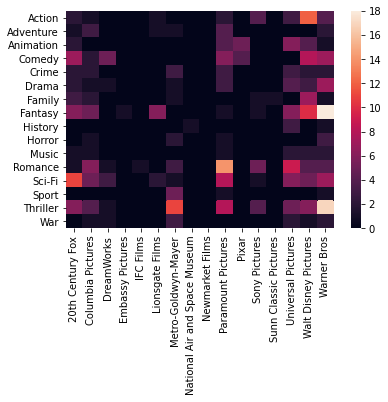

In [24]:
movies_by_studios = movies.groupby("studio")
studio_list = []
heatmap_matrix = np.zeros((16,len(movies_by_studios)))

#Move along matrix for heatmap
studio_num = 0
genre_num = 0

for studio, group in movies_by_studios:
    studio_list.append(studio)
    #print(studio)
    genre_num = 0
    for genre in genres:
        #print(genre)
        #print(group["Main_Genre"].loc[group["Main_Genre"] == genre].agg('count'))
        heatmap_matrix[genre_num][studio_num] = group["Genre_2"].loc[group["Main_Genre"] == genre].agg('count')
        genre_num += 1
    studio_num += 1

ax = sns.heatmap(heatmap_matrix,xticklabels=studio_list,yticklabels=genres)


### Write your interpretations here

Warner Brothers produces movies in many different categories, mostly thrillers, fantasy and a bit of comedy. The most successful genre of Walt Disney is fantasy with a little bit of action. Universal Pictures and Paramount Pictures produce most of the Romanche films.

## 2.4 Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

### Write your dataviz show-off code here

In [25]:
#ALREADY USED ABOVE: movies_by_genre = movies.groupby("Main_Genre")
genre_rankings = []

for genre, group in movies_by_genre:
    genre_rankings.append(group['rank_in_year'].values)

In [26]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey = True, figsize=(20,20))

count = 0
for i in range(4):
    for j in range(4):
        axs[i][j].hist(genre_rankings[count], facecolor='red')
        axs[i][j].set_title(genres[count])
        axs[i][j].set_xlim([0, 10])
        axs[i][j].set_ylim([0,25])
        count += 1

        
fig.suptitle('Movie Rankings For Each Genre')
fig.text(0.5, 0.04, 'Movie Rankings', ha='center')
fig.text(0.04, 0.5, 'Number of Movies', va='center', rotation='vertical')
fig.tight_layout()

## Part 3: Visualizing skewed distributions

__3.A__ Familiarize yourself with the "pop_per_commune" dataframe, that contains information about each commune, and its population. Plot a histogram of the population counts (population_Dec) and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

### Write your code here

In [27]:
plt.hist(commune_pop["population_Dec"],40)
plt.grid()
plt.title("Histogram of Population Count")

Text(0.5, 1.0, 'Histogram of Population Count')

In [28]:
commune_pop.head(50)

commune  population_Jan  birth_alive  death  \
0                         Suisse 2)         8419550        87381  66971   
1                          - Zürich         1487969        17070  11076   
2               >> Bezirk Affoltern           52904          517    310   
3        ......0001 Aeugst am Albis            1977           10      7   
4     ......0002 Affoltern am Albis           11900          128     93   
5             ......0003 Bonstetten            5435           47     25   
6        ......0004 Hausen am Albis            3571           27     20   
7               ......0005 Hedingen            3687           31     20   
8        ......0006 Kappel am Albis            1110           10     10   
9                 ......0007 Knonau            2168           21     11   
10           ......0008 Maschwanden             626            9      5   
11        ......0009 Mettmenstetten            4861           60     20   
12              ......0010 Obfelden            5131           46     25   
13             ......0011 Ottenbach            2591           15     14   
14            ......0012 Rifferswil            1078            6      4   
15             ......0013 Stallikon            3646           48     16   
16     ......0014 Wettswil am Albis            5123           59     40   
17            >> Bezirk Andelfingen           30981          300    219   
18               ......0021 Adlikon             666           15      3   
19           ......0022 Benken (ZH)             857            7     10   
20        ......0023 Berg am Irchel             567            7      5   
21        ......0024 Buch am Irchel             957           15      2   
22               ......0025 Dachsen            1998           11     11   
23                  ......0026 Dorf             629            7      4   
24           ......0027 Feuerthalen            3596           36     35   
25                ......0028 Flaach            1362           21      9   
26            ......0029 Flurlingen            1434           15      9   
27           ......0030 Andelfingen            2224           20     25   
28              ......0031 Henggart            2242           15     11   
29              ......0032 Humlikon             496            1      3   
30      ......0033 Kleinandelfingen            2067           21     11   
31       ......0034 Laufen-Uhwiesen            1650           13     12   
32             ......0035 Marthalen            1938           15     15   
33         ......0036 Oberstammheim            1191           11      9   
34              ......0037 Ossingen            1456           16      6   
35               ......0038 Rheinau            1302            9     14   
36  ......0039 Thalheim an der Thur             919           12      4   
37             ......0040 Trüllikon            1064            8      5   
38             ......0041 Truttikon             469            2      1   
39        ......0042 Unterstammheim             899            9      5   
40                ......0043 Volken             341            7      5   
41           ......0044 Waltalingen             657            7      5   
42                 >> Bezirk Bülach          147379         1721    942   
43          ......0051 Bachenbülach            4087           37     23   
44           ......0052 Bassersdorf           11616          125     59   
45                ......0053 Bülach           19611          234    134   
46             ......0054 Dietlikon            7568           79     43   
47               ......0055 Eglisau            5167           62     28   
48               ......0056 Embrach            9189           91     65   
49    ......0057 Freienstein-Teufen            2342           16     11   

    natrual_increase  arrivals  departure  migratory_balance  \
0              20410    681011     635063              45948   
1               5994    120593     108666              11927   
2         



__3.B__ The figure below represents 4 types of histogram. At this stage, your distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as shown in Fig.(d), in which the y-axis represents the number of data points with values greater than y. Create the figures (b) and (d) using the data extracted for task 1A. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw.png" style="width: 600px;" align="left">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

In [29]:
# Write your code here

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Histogram of Population Count')

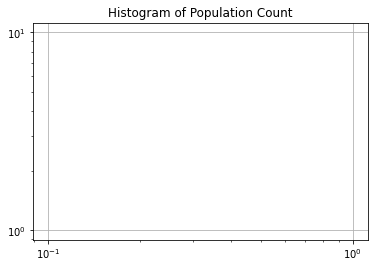

In [30]:
plt.hist(np.log(commune_pop["population_Dec"]),bins=np.logspace(np.log10(0.1),np.log10(1.0), 50))
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title("Histogram of Population Count")

In [26]:
# Write your interpretations here